In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jeromenicholas","key":"6523efde7560779ea8dc402ed0669863"}'}

In [2]:
!pip install -q kaggle
print('Kaggle API installed')



Kaggle API installed


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          19330  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25          14302  
lava18/google-play-store-apps                                Google Play Store Apps                                2MB  2019-02-03 13:55:47          44201  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          16694  
jessicali9530/stanford-dogs-dataset                       

In [5]:
!kaggle datasets download -d prasunroy/natural-images

 98% 168M/171M [00:01<00:00, 93.1MB/s]
100% 171M/171M [00:01<00:00, 115MB/s] 


In [6]:
!unzip /content/natural-images.zip

Archive:  /content/natural-images.zip
   creating: natural_images/
   creating: natural_images/airplane/
  inflating: natural_images/airplane/airplane_0000.jpg  
  inflating: natural_images/airplane/airplane_0001.jpg  
  inflating: natural_images/airplane/airplane_0002.jpg  
  inflating: natural_images/airplane/airplane_0003.jpg  
  inflating: natural_images/airplane/airplane_0004.jpg  
  inflating: natural_images/airplane/airplane_0005.jpg  
  inflating: natural_images/airplane/airplane_0006.jpg  
  inflating: natural_images/airplane/airplane_0007.jpg  
  inflating: natural_images/airplane/airplane_0008.jpg  
  inflating: natural_images/airplane/airplane_0009.jpg  
  inflating: natural_images/airplane/airplane_0010.jpg  
  inflating: natural_images/airplane/airplane_0011.jpg  
  inflating: natural_images/airplane/airplane_0012.jpg  
  inflating: natural_images/airplane/airplane_0013.jpg  
  inflating: natural_images/airplane/airplane_0014.jpg  
  inflating: natural_images/airplane/air

Using TensorFlow backend.


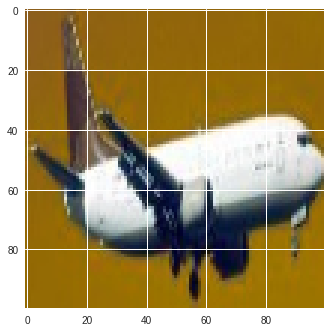

(100, 100, 3)


In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D,BatchNormalization
from keras.layers import MaxPooling2D,Dropout
from keras.layers import Flatten
from keras.layers import Dense
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

datadir = "/content/natural_images"
categories = ["airplane","car","cat","dog","flower","fruit","motorbike","person"]
img_size = 100

for cat in categories:
    path = os.path.join(datadir,cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        new_img_array1=cv2.resize(img_array,(img_size,img_size))
        #new_img_array = tf.keras.preprocessing.image.img_to_array(new_img_array1)
        
        plt.imshow(new_img_array1)
        plt.show()
        
        print(new_img_array1.shape)
        
        break
    break
    



In [0]:
training_data = []

def create_training_data():
    
    for cat in categories:
        path = os.path.join(datadir,cat)
        class_num = categories.index(cat)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_img_array1=cv2.resize(img_array,(img_size,img_size))
            #new_img_array = tf.keras.preprocessing.image.img_to_array(new_img_array1)

            training_data.append([new_img_array1,class_num])
    

In [0]:
create_training_data()

In [0]:
import random

In [0]:
random.shuffle(training_data)

In [0]:
X = []
Y = []
for features,labels in training_data:
    X.append(features)
    Y.append(labels)

In [0]:
from sklearn.model_selection import train_test_split

(x_train,x_test,y_train,y_test)=train_test_split(X,Y,test_size=0.1,random_state=42)

In [0]:
x_train1 = np.array(x_train).reshape(-1,img_size,img_size,3)




In [0]:
x_test1 = np.array(x_test).reshape(-1,img_size,img_size,3)


In [0]:
y_test1 = np.array(y_test)
y_train1 = np.array(y_train)


In [17]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Convolution2D(32, (3, 3), input_shape = (img_size, img_size, 3), activation = 'relu',padding='same'))
# Adding a second convolutional layer
#classifier.add(BatchNormalization(axis=1))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))


classifier.add(Convolution2D(64, (3, 3), activation = 'relu',padding='same'))
# Adding a second convolutional layer
# classifier.add(Convolution2D(64, (3, 3), activation = 'relu',padding='same'))
#classifier.add(BatchNormalization(axis=1))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))


classifier.add(Convolution2D(128, (3, 3), activation = 'relu',padding='same'))
# Adding a second convolutional layer
# classifier.add(Convolution2D(128, (3, 3), activation = 'relu',padding='same'))
#classifier.add(BatchNormalization(axis=1))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))
# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dense(1024,activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

# Step 4 - Full connection
classifier.add(Dense(8, activation = 'softmax'))


classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])
classifier.fit(x_train1, y_train1, batch_size=32, epochs=10)
loss, acc = classifier.evaluate(x_test1,y_test1, batch_size=32)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
6209/6209 [==============================] - 22s 4ms/step - loss: 0.8203 - sparse_categorical_accuracy: 0.7278
Epoch 2/10
6209/6209 [==============================] - 17s 3ms/step - loss: 0.3617 - sparse_categorical_accuracy: 0.8683
Epoch 3/10
6209/6209 [==============================] - 17s 3ms/step - loss: 0.2679 - sparse_categorical_accuracy: 0.9001
Epoch 4/10
6209/6209 [==============================] - 17s 3ms/step - loss: 0.2142 - sparse_categorical_accuracy: 0.9177
Epoch 5/10
6209/6209 [==============================] - 17s 3ms/step - loss: 0.2129 - sparse_categorical_accuracy: 0.9190
Epoch 6/10
6209/6209 [==============================] - 18s 3ms/step - loss: 0.1624 - sparse_categorical_accuracy: 0.9383
Epoch 7/10
6209/6209 [===========

In [18]:
loss, acc = classifier.evaluate(x_test1,y_test1, batch_size=32)
print(acc)

690/690 [==============================] - 0s 540us/step
0.8739130429599596


In [0]:
predictions = classifier.predict([x_test1])

predicted : car
label : car


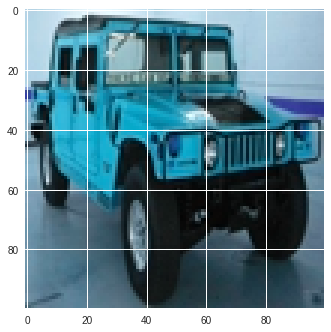

In [24]:
index = random.randint(0,690)
print('predicted :', categories[np.argmax(predictions[index])] )
print('label :' , categories[y_test1[index]])

plt.imshow(x_test1[index])
plt.show()